# Project 6

## -- Data Cleaning --

### By: Carly Marshanda Arta MS

In [16]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.impute import KNNImputer
from scipy.stats import boxcox
import matplotlib.pyplot as plt

In [7]:
# Load Dataset

df = pd.read_csv('C:/Users/TOSHIBA/Data Analyst/4. Carly Project/Project 6/train.csv')
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [9]:
# Load Dataset

df = pd.read_csv('C:/Users/TOSHIBA/Data Analyst/4. Carly Project/Project 6/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Identifying Outliers

## A. Identifying Outliers using IQR (Interquartile Range) Method

### 1. Calculate Q1 (25th percentile) and Q3 (75th percentile) of the 'Fare' Column

In [28]:
# Calculate Q1 and Q3
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1

Number of outliers detected: 116
Data after removing outliers:
(775, 12)


### 2. Compute IQR as the difference between Q3 and Q1

In [38]:
# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

### 3. Define the lower and upper bounds as Q1 - 1.5 * IQR and Q3 + 1.5 * IQR, respectively

In [42]:
# Identify outliers
outliers = df[(df['Fare'] < lower_bound) | (df['Fare'] > upper_bound)]

### 4. Identify and filter out the data points that lie outside these bounds

In [44]:
# Filter out the outliers
df_filtered = df[(df['Fare'] >= lower_bound) & (df['Fare'] <= upper_bound)]

print("Number of outliers detected:", len(outliers))
print("Data after removing outliers:")
print(df_filtered.shape)

Number of outliers detected: 116
Data after removing outliers:
(775, 12)


## B. Identifying Outliers using Z-Score Method

### 1. Calculate the mean and standard deviation of the 'Fare' Column

In [50]:
# Calculate the z-scores of the 'Fare' column

df['z_score'] = stats.zscore(df['Fare'])

### 2. Compute the z-score for each data point

In [54]:
# identify outliers based on z-score

z_score_threshold = 3
outliers_z = df[(df['z_score'].abs() > z_score_threshold)]

### 3. Identify and filter out the data points with z-scores greater than 3 or less than -3

In [61]:
# filter out the outlier

df_filtered_z = df[(df['z_score'].abs() <= z_score_threshold)]

print("Number of outliers detected using z-scores:", len(outliers_z))
print("Data after removing outliers using z-scores")
print(df_filtered_z.shape)

Number of outliers detected using z-scores: 20
Data after removing outliers using z-scores
(871, 13)


# Imputation

## A. Simple Imputation

### 1. Identify theh column with missing values 

In [67]:
# display the number of missing values in each column

print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
z_score          0
dtype: int64


### 2. Replace missing values with the mean, median, or mode of the column

In [69]:
# fill missing values in 'age' with the median age

df['Age'].fillna(df['Age'].median(), inplace=True)

# Check if the missing values have been filled

print("Number of missing values after imputation")
print(df.isnull().sum())

Number of missing values after imputation
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
z_score          0
dtype: int64


C:\Users\TOSHIBA\AppData\Local\Temp\ipykernel_11892\1067696348.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


## B. Advance Imputation using KNN

### 1. Select the column relevant for imputation

In [113]:
# select relevant column for imputation
df_impute = df[['Age', 'Pclass', 'SibSp', 'Parch', 'Fare']]

# Transformation

## A. Log Transformation

### 1. Identify the skewed column in the dataset

Text(0, 0.5, 'Frequency')

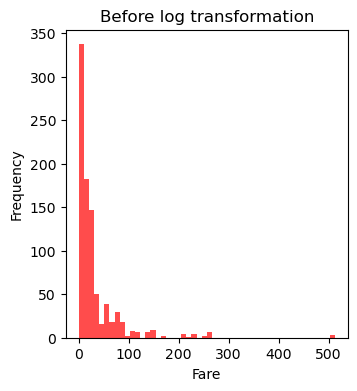

In [94]:
# Display the distribution of the 'Fare' column before transformation
plt.figure(figsize = (8, 4))
plt.subplot(1, 2, 1)
plt.hist(df['Fare'], bins = 50, color = 'red', alpha = 0.7)
plt.title('Before log transformation')
plt.xlabel('Fare')
plt.ylabel('Frequency')

### 2. Apply log transformation to the column

Text(0, 0.5, 'Frequency')

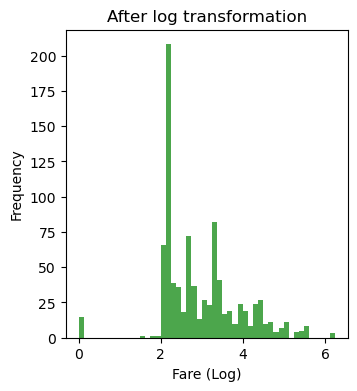

In [99]:
# Apply log transformation (adding 1 to avoid log(0))
df['Fare_log'] = np.log(df['Fare'] + 1)

# Display the distribution of the 'Fare' column after transformation
plt.figure(figsize = (8, 4))
plt.subplot(1, 2, 2)
plt.hist(df['Fare_log'], bins = 50, color = 'green', alpha = 0.7)
plt.title('After log transformation')
plt.xlabel('Fare (Log)')
plt.ylabel('Frequency')

## B. Box-Cox Transformation

### 1. Identify the skewed column in the dataset

Text(0, 0.5, 'Frequency')

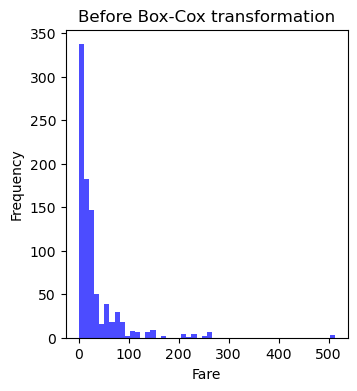

In [104]:
# Apply log transformation (adding 1 to avoid log(0))
df['Fare_boxcox'], fitted_lambda = boxcox(df['Fare'] + 1)

# Display the distribution of the 'Fare' column after transformation
plt.figure(figsize = (8, 4))
plt.subplot(1, 2, 1)
plt.hist(df['Fare'], bins = 50, color = 'blue', alpha = 0.7)
plt.title('Before Box-Cox transformation')
plt.xlabel('Fare')
plt.ylabel('Frequency')

### 2. Apply the box-cox transformation to the column

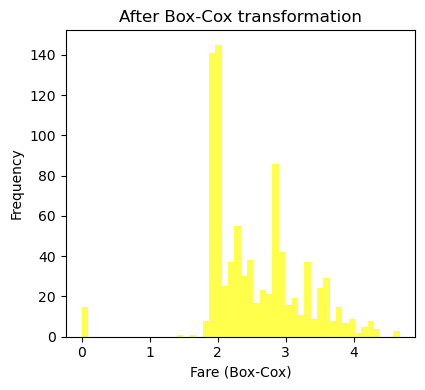

In [107]:
# Apply log transformation (adding 1 to avoid log(0))
df['Fare_boxcox'], fitted_lambda = boxcox(df['Fare'] + 1)

# Display the distribution of the 'Fare' column after transformation
plt.figure(figsize = (8, 4))
plt.subplot(1, 2, 2)
plt.hist(df['Fare_boxcox'], bins = 50, color = 'yellow', alpha = 0.7)
plt.title('After Box-Cox transformation')
plt.xlabel('Fare (Box-Cox)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# - END -